TASK -03

The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learnhow to train a car price prediction model then this project is for you

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


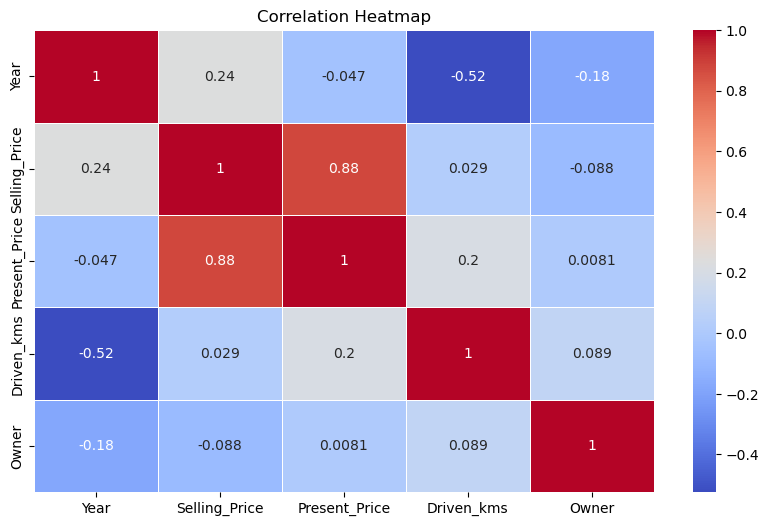

Mean Squared Error (MSE): 4.125555394840549
R-squared (R²): 0.8209051135122415


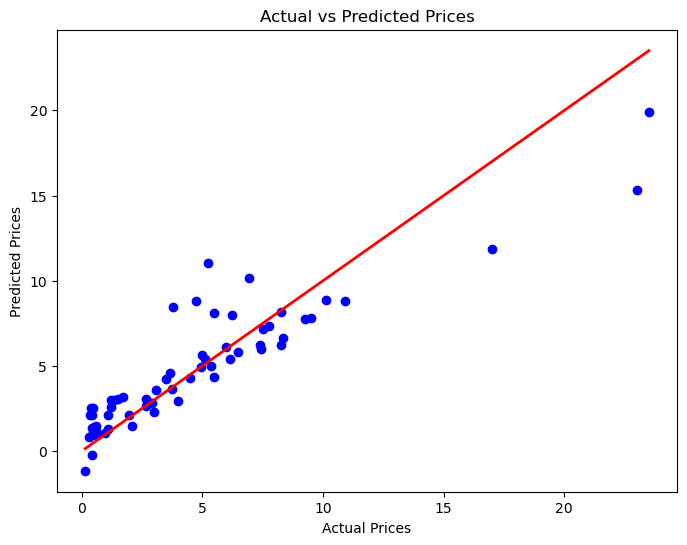

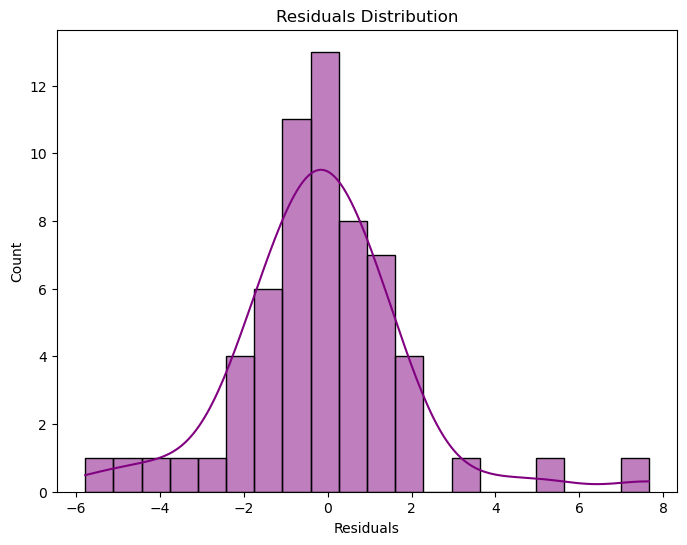

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("C:\\Users\\Harshika k\\Downloads\\car data.csv")
print(data.head())

plt.figure(figsize=(10, 6))

numeric_data = data.select_dtypes(include=[float, int])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

X = data[['Year', 'Present_Price', 'Driven_kms', 'Owner']] 
y = data['Selling_Price']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

